# Demand Forecast Autoregressive Model

This notebook reads in time-series demand data and generates a week ahead demand forecast using the stats models autoregression model. For a detailed exploration of the time series data go to the Demand EDA notebook.

### Imports

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

### Read in demand data, set datetime index, resample at hourly scale

In [19]:
ts = pd.read_csv('../datasets/time_series/demand_series.csv')
print(ts.shape)
ts.head(3)

(220703, 4)


,date,forecast,demand,net_demand
0,2018-04-12 00:00:00,21942.0,21825.0,17634.0
1,2018-04-12 00:05:00,21661.0,21694.0,17555.0
2,2018-04-12 00:10:00,21661.0,21619.0,17430.0


In [20]:
ts['date'] = pd.to_datetime(ts['date'])
ts.set_index('date', inplace=True)
mwh = ts.resample('H').mean()
print(mwh.shape)
mwh.head(3)

(18504, 3)


,forecast,demand,net_demand
date,,,
2018-04-12 00:00:00,21429.250000,21373.250000,17073.333333
2018-04-12 01:00:00,20564.083333,20519.916667,16348.083333
2018-04-12 02:00:00,20070.083333,20067.416667,15830.250000


### Fix null values and split into train/test sets

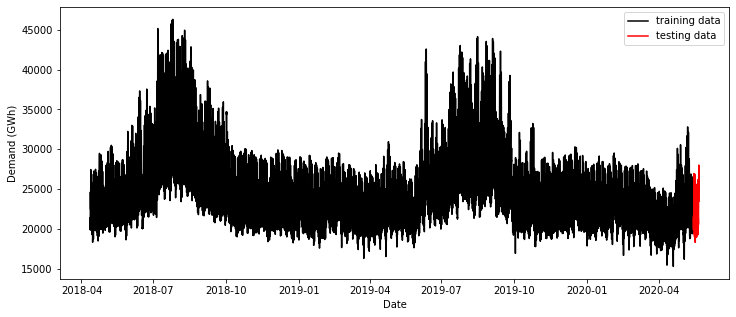

In [21]:
# filling missing values with mean demand
series = mwh['demand'].fillna(np.mean(mwh['demand']))

# train test split, training set is all but one week, testing set is last week of series
train,test = series[:24*7*-1], series[24*7*-1:]

# plot training and testing sets
plt.figure(figsize=(12,5))
plt.plot(train.index,train,'k-',label='training data')
plt.plot(test.index,test,'r-',label='testing data')
plt.xlabel('Date')
plt.ylabel('Demand (GWh)')
plt.legend();

### Instantiate and run AR model

In [22]:
# instantiate and fit model
model = AutoReg(train,lags=24*13)
model_fit = model.fit()

# generate predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

### Visualize results

RMSE = 1129.9


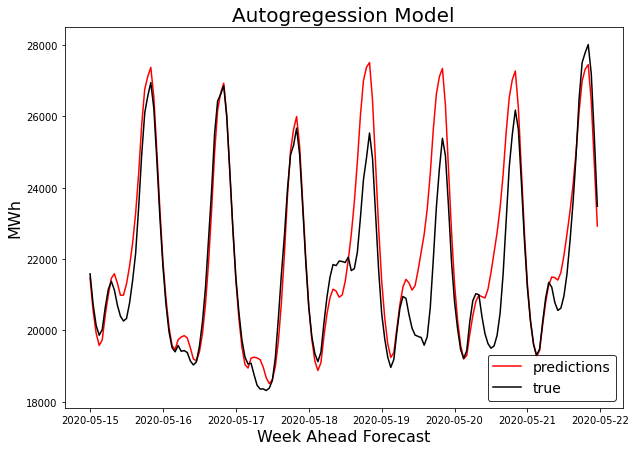

In [39]:
print(f"RMSE = {round(np.sqrt(mean_squared_error(test, predictions)),1)}")
plt.figure(figsize=(10,7))
plt.plot(predictions,'r',label='predictions')
plt.plot(test,'k',label='true')
plt.xlabel('Week Ahead Forecast',fontsize=16)
plt.ylabel('MWh',fontsize=16)
plt.title('Autogregession Model',fontsize=20)
plt.legend(fontsize=14,loc='lower right',edgecolor='k');

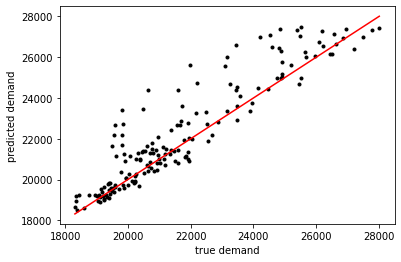

In [38]:
plt.plot(test,predictions,'k.')
plt.plot([min(test),max(test)],[min(test),max(test)],'r-')
plt.xlabel('true demand')
plt.ylabel('predicted demand');

### Model Summary

In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 demand   No. Observations:                18336
Model:                   AutoReg(312)   Log Likelihood             -125192.241
Method:               Conditional MLE   S.D. of innovations            251.370
Date:                Mon, 08 Jun 2020   AIC                             11.089
Time:                        19:24:53   BIC                             11.225
Sample:                    04-25-2018   HQIC                            11.133
                         - 05-14-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      24.1535     14.433      1.674      0.094      -4.134      52.441
demand.L1       1.4049      0.007    188.856      0.000       1.390       1.419
demand.L2      -0.3142      0.013    -24.483      0.000      -0.339      -0.289
demand.L3      -0.1200      0.013     -9.201      0.000      -0.146      -0.094
demand.L4      -0.0248      0.013     -1.898      0.058      -0.050       0.001
demand.L5      -0.0140      0.013     -1.071      0.284      -0.040       0.012
demand.L6       0.0099      0.013      0.754      0.451      -0.016       0.035
demand.L7       0.0056      0.013      0.430      0.667      -0.020       0.031
demand.L8      -0.0298      0.013     -2.277      0.023      -0.055      -0.004
demand.L9       0.0360      0.013      2.753      0.006       0.010       0.062
demand.L10      0.0149      0.013      1.138      0.255      -0.011       0.041
demand.L11      0.0134      0.013      1.027      0.304      -0.012       0.039
demand.L12     -0.0132      0.013     -1.007      0.314      -0.039       0.012
demand.L13     -0.0137      0.013     -1.044      0.297      -0.039       0.012
demand.L14     -0.0083      0.013     -0.632      0.528      -0.034       0.017
demand.L15     -0.0174      0.013     -1.333      0.182      -0.043       0.008
demand.L16     -0.0085      0.013     -0.652      0.514      -0.034       0.017
demand.L17      0.0634      0.013      4.849      0.000       0.038       0.089
demand.L18      0.0207      0.013      1.582      0.114      -0.005       0.046
demand.L19     -0.0249      0.013     -1.902      0.057      -0.051       0.001
demand.L20      0.0043      0.013      0.330      0.742      -0.021       0.030
demand.L21     -0.0006      0.013     -0.046      0.963      -0.026       0.025
demand.L22     -0.0009      0.013     -0.068      0.946      -0.027       0.025
demand.L23      0.1148      0.013      8.772      0.000       0.089       0.140
demand.L24      0.1913      0.013     14.581      0.000       0.166       0.217
demand.L25     -0.3698      0.013    -28.024      0.000      -0.396      -0.344
demand.L26     -0.0176      0.013     -1.305      0.192      -0.044       0.009
demand.L27      0.0898      0.013      6.665      0.000       0.063       0.116
demand.L28      0.0173      0.013      1.281      0.200      -0.009       0.044
demand.L29      0.0082      0.013      0.606      0.545      -0.018       0.035
demand.L30     -0.0246      0.013     -1.824      0.068      -0.051       0.002
demand.L31     -0.0064      0.013     -0.475      0.635      -0.033       0.020
demand.L32      0.0482      0.013      3.569      0.000       0.022       0.075
demand.L33     -0.0382      0.013     -2.833      0.005      -0.065      -0.012
demand.L34     -0.0259      0.014     -1.921      0.055      -0.052       0.001
demand.L35      0.0274      0.014      2.028      0.043       0.001       0.054
demand.L36      0.0033      0.014      0.245      0.806      -0.023       0.030
demand.L37     -0.0076      0.014     -0.

### Write predictions to file

In [ ]:
# predictions.to_csv('../datasets/demand_predictions.csv')